# Seminar 4. Patterns encoding: Brian2 realizations

In [1]:
!pip install brian2
!pip install --upgrade numpy
!pip install --upgrade matplotlib


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from brian2 import *
import brian2.numpy_ as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
import numpy as np
import brian2 as b2
from matplotlib import pyplot as plt
%matplotlib inline

 # Добавления шума к картинке

In [29]:
import numpy as np
import cv2
img = cv2.imread(img_path)
mean = 0
var = 10
sigma = var ** 0.2
gaussian = np.random.normal(mean, sigma, (224, 224)) #  np.zeros((224, 224), np.float32)

noisy_image = np.zeros(img.shape, np.float32)

if len(img.shape) == 2:
    noisy_image = img + gaussian
else:
    noisy_image[:, :, 0] = img[:, :, 0] + gaussian
    noisy_image[:, :, 1] = img[:, :, 1] + gaussian
    noisy_image[:, :, 2] = img[:, :, 2] + gaussian

cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)

cv2.imshow("img", img)
cv2.imshow("gaussian", gaussian)
cv2.imshow("noisy", noisy_image)

cv2.waitKey(0)

NameError: ignored

In [5]:
import numpy as np
import os
import cv2
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
  elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
  elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy
      
noise_img = sp_noise(image,0.05) cv2.imwrite('sp_noise.jpg', noise_img)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 31)

# Генерируем картинки

In [42]:
max_intensity = 1
min_intensity = 0
ni = 3

right_intensity = np.arange(ni) * max_intensity / (ni - 1)
#right_intensity = np.array(0,1,0, 1,0,1, 0,1,0)
print(right_intensity)

left_intensity = np.arange(ni - 1, -1, -1) * max_intensity / (ni - 1)
#left_intensity = np.array(1,1,1, 0,1,0,  0,1,0)
print(left_intensity)

[0.  0.5 1. ]
[1.  0.5 0. ]


In [11]:
import numpy as np
import os
import math
import random


from PIL import Image, ImageFont, ImageDraw, ImageEnhance, ImageChops

WIDTH   = 120
MINSIZE = 20
MAXSIZE = 40

kandinsky_colors = ['black', 'white']
kandinsky_numbers = ['zero', 'one','two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']


def square (d,cx,cy,s,f):
  s = 0.7 * s
  d.rectangle(((cx-s/2, cy-s/2), (cx+s/2, cy+s/2)), fill=f)

In [12]:
kandinsky_shapes = [square,square,square]

In [25]:
def kandinskyFigure (shapes, subsampling = 1):
    image = Image.new("RGBA", (subsampling*WIDTH,subsampling*WIDTH), (220,220,220,255))
    d = ImageDraw.Draw(image)
    for s in shapes:
        s['shape']( d, subsampling*s['cx'], subsampling*s['cy'], subsampling*s['size'], s['color'] )
    if subsampling>1:
    image = image.resize( (WIDTH,WIDTH), Image.BICUBIC)
    return image

IndentationError: expected an indented block (3301208526.py, line 7)

In [26]:
def overlaps (shapes):
    image = Image.new("L", (WIDTH,WIDTH), 0)
    sumarray = np.array(image)
    d = ImageDraw.Draw(image)

    for s in shapes:
    image      = Image.new("L", (WIDTH,WIDTH), 0)
    d = ImageDraw.Draw(image)
    s['shape']( d, s['cx'], s['cy'], s['size'], 10 )
    sumarray = sumarray + np.array(image)

    sumimage = Image.fromarray (sumarray)
    return sumimage.getextrema ()[1] > 10

IndentationError: expected an indented block (3202850945.py, line 7)

In [27]:
def combineFigures (n, f):
    images = []
    for i in range (n):
    shapes = f()
    while overlaps (shapes):
        shapes = f()
    image = kandinskyFigure (shapes,4)    
    images.append (image)

    allimages = Image.new("RGBA", (WIDTH*n+20*(n-1),WIDTH), (255,255,255,255))
    for i in range (n):
    allimages.paste ( images[i], ( WIDTH*i+20*(i), 0))
    return allimages

IndentationError: expected an indented block (4055665729.py, line 4)

In [22]:
kandinskyFigure(shapes = kandinsky_shapes[0])

TypeError: 'function' object is not iterable

In [14]:
def randomShapes(min, max):
  nshapes  = random.randint (min,max)
  shapes = []
  for i in range (nshapes):
    cx = random.randint (MAXSIZE/2,WIDTH-MAXSIZE/2)
    cy = random.randint (MAXSIZE/2,WIDTH-MAXSIZE/2)
    size  = random.randint (MINSIZE,MAXSIZE)
    col  = random.randint (0,2)
    sha  = random.randint (0,2)
    shape = {'shape':kandinsky_shapes[sha], 'cx':cx, 'cy':cy, 'size':size, 'color':kandinsky_colors[col]}
    shapes.append (shape)
  return shapes

def onlyCircles (min, max):
  nshapes  = random.randint (min,max)
  shapes = []
  for i in range (nshapes):
    cx = random.randint (MAXSIZE/2,WIDTH-MAXSIZE/2)
    cy = random.randint (MAXSIZE/2,WIDTH-MAXSIZE/2)
    size  = random.randint (MINSIZE,MAXSIZE)
    col  = random.randint (0,2)   
    shape = {'shape':circle, 'cx':cx, 'cy':cy, 'size':size, 'color':kandinsky_colors[col]}
    shapes.append (shape)
  return shapes

def shapesOnLine (min, max):
  nshapes  = random.randint (min,max)
  
  dx =  math.cos (random.random()* math.pi * 2) * (WIDTH/2-MAXSIZE/2)
  dy =  math.sin (random.random()* math.pi * 2) * (WIDTH/2-MAXSIZE/2)
  sx = WIDTH/2  - dx  
  sy = WIDTH/2  + dy  
  ex = WIDTH/2  + dx  
  ey = WIDTH/2  - dy  
  dx =  ex-sx
  dy =  ey-sy
  shapes = []
  for i in range (nshapes):
    r = random.random() 
    cx = sx + r * dx
    cy = sy + r * dy
    size  = random.randint (MINSIZE,MAXSIZE)
    col  = random.randint (0,2)
    sha  = random.randint (0,2)
    shape = {'shape':kandinsky_shapes[sha], 'cx':cx, 'cy':cy, 'size':size, 'color':kandinsky_colors[col]}
    shapes.append (shape)

  return shapes

def shapesWithEqualArea(min, max):
  nshapes  = random.randint (min,max)
  shapes = []
  size  = random.randint (MINSIZE,MAXSIZE)
  for i in range (nshapes):
    cx = random.randint (MAXSIZE/2,WIDTH-MAXSIZE/2)
    cy = random.randint (MAXSIZE/2,WIDTH-MAXSIZE/2)
    col  = random.randint (0,2)
    sha  = random.randint (0,2)
    shape = {'shape':kandinsky_shapes[sha], 'cx':cx, 'cy':cy, 'size':size, 'color':kandinsky_colors[col]}
    shapes.append (shape)
  return shapes

def twoPairsOnlyOneWithSameColor():
  shapes = []
  size  = random.randint (MINSIZE,MAXSIZE)

  sha  = random.randint (0,2)
  col  = random.randint (0,2)
  cx = random.randint (MAXSIZE/2,WIDTH-MAXSIZE/2)
  cy = random.randint (MAXSIZE/2,WIDTH-MAXSIZE/2)
  shape = {'shape':kandinsky_shapes[sha], 'cx':cx, 'cy':cy, 'size':size, 'color':kandinsky_colors[col]}
  shapes.append (shape)
 
  colOld =  col 
  while col == colOld:
    col  = random.randint (0,2) 
  cx = random.randint (MAXSIZE/2,WIDTH-MAXSIZE/2)
  cy = random.randint (MAXSIZE/2,WIDTH-MAXSIZE/2)
  size  = random.randint (MINSIZE,MAXSIZE)
  shape = {'shape':kandinsky_shapes[sha], 'cx':cx, 'cy':cy, 'size':size, 'color':kandinsky_colors[col]}
  shapes.append (shape)
  
  shaOld =  sha 
  while sha == shaOld:
     sha  = random.randint (0,2)
      
  col  = random.randint (0,2)
  for i in range (2):
    cx = random.randint (MAXSIZE/2,WIDTH-MAXSIZE/2)
    cy = random.randint (MAXSIZE/2,WIDTH-MAXSIZE/2)
    size  = random.randint (MINSIZE,MAXSIZE)
    shape = {'shape':kandinsky_shapes[sha], 'cx':cx, 'cy':cy, 'size':size, 'color':kandinsky_colors[col]}
    shapes.append (shape)    
  return shapes

In [16]:
combineFigures (6, lambda: randomShapes(1,2))

WARNING    /var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T/ipykernel_74107/3867562106.py:7: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image = image.resize( (WIDTH,WIDTH), Image.BICUBIC)
 [py.warnings]


IndexError: list index out of range

In [17]:
combineFigures (1, lambda: twoPairsOnlyOneWithSameColor())

IndexError: list index out of range

In [29]:
DELTASIZE = MAXSIZE - MINSIZE
SMALLSIZECHECK = MINSIZE + DELTASIZE /3
BIGSIZECHECK   = MAXSIZE - DELTASIZE /3


def descColorShapeSize (shapes, prefix = ''):
    descrition = prefix
    multipleshape = False
    for s in shapes:
        if multipleshape: descrition = descrition + " and " + prefix 
        sizestring = ''
        if s['size'] < SMALLSIZECHECK: sizestring = 'small'
        if s['size'] > BIGSIZECHECK:   sizestring = 'big'
        if len (sizestring) > 0:  descrition = descrition + sizestring +  " "
        descrition = descrition  +  s['color'] +  " " +  s['shape'].__name__
        multipleshape = True 
    return descrition
  
def descNumbers (shapes):  
  descrition =  descColorShapeSize (shapes, 'one ')
  #lets look if we find some patterns
  ns = {}
  nc = {}
  for s in kandinsky_shapes: ns[s] = 0
  for s in kandinsky_colors: nc[s] = 0
  for s in shapes:
      ns[s['shape']] += 1
      nc[s['color']] += 1
  maxcolor = ''
  maxshape = ''
  maxnumcolor = 0
  maxnumshap  = 0
  for c in kandinsky_colors: 
      if nc[c] > maxnumcolor:
        maxnumcolor = nc[c]
        maxcolor = c
  for s in kandinsky_shapes: 
      if ns[s] > maxnumshap:
        maxnumshap = ns[s]
        maxshape = s.__name__

  if maxnumcolor > 1 or maxnumshap > 1:
    if maxnumcolor >= maxnumshap:
        descrition = kandinsky_numbers[maxnumcolor] + " " + maxcolor + " shapes"
    else:  
        descrition = kandinsky_numbers[maxnumshap] + " " + maxshape + "s"
  
    if (maxnumcolor == maxnumshap) and (maxnumcolor == len(shapes)):
        descrition = kandinsky_numbers[maxnumshap] + " " + maxcolor + " " + maxshape + "s"
    
  return descrition  
  
def descPairs (shapes):  
  # thats not perfect, it e.g. does not describe two pairs, or a pair, if some other shape has 3 objects
  descrition =  ""
  ns = {}
  for s in kandinsky_shapes: ns[s] = 0
  for s in shapes:
      ns[s['shape']] += 1
  maxshape = ''
  maxnumshap  = 0
  for s in kandinsky_shapes: 
      if ns[s] > maxnumshap:
        maxnumshap = ns[s]
        maxshape = s.__name__
  if maxnumshap ==  2:
     descrition = "a pair of "+ maxshape + "s"    
  return descrition  

In [30]:
f =  lambda: randomShapes(4,6)
os.makedirs("randomcaptions", exist_ok=True)
for i in range (100):
  shapes = f()
  while overlaps (shapes):
    shapes = f()
  
  descrition = descNumbers (shapes)
  image = kandinskyFigure (shapes,4)  
  filename = "randomcaptions/%06d" % i
  image.save (filename+".png")
  text_file = open(filename+".txt", "w")
  text_file.write(descrition)
  text_file.close()  

IndexError: list index out of range

In [31]:
f =  lambda: randomShapes(6,8)
shapes = f()
while overlaps (shapes) or len (descPairs(shapes)) == 0:
    shapes = f()
  
print (descColorShapeSize(shapes))
print ( descNumbers(shapes))
print ( descPairs(shapes))
kandinskyFigure (shapes,4) 
 

IndexError: list index out of range

In [32]:
def draw_intensity(intensity_samples, minI, maxI):
  x = np.arange(-0.5, ni, 1)
  print(x)
  y = np.arange(-0.5, 2, 1)
  print(x)
  fig, ax = plt.subplots(figsize=(10,5))
  ax.set_xticks(range(ni))
  ax.set_yticks([0, 1])
  ax.set_yticklabels(["Left", "Right"])
  ax.pcolormesh(x, y, intensity_samples, cmap='gray', vmin=minI, vmax=maxI)
  for k in x:
     plt.axvline(k, ls='-', c='w', lw=4) # white line between bars
  for k in y:
    plt.axhline(k, ls='-', c='white', lw=20) # white line between samples

intensities = np.array([left_intensity, right_intensity])
draw_intensity(intensities, min_intensity, max_intensity)

NameError: name 'left_intensity' is not defined

In [33]:
x = (0,1,0 ,1,0,1 ,0,1,0)
y = (1,1,1, 0,1,0, 0,1,0)
intensities = np.array([x, y])
draw_intensity(intensities, min_intensity, max_intensity)

NameError: name 'min_intensity' is not defined

NameError: name 'ni' is not defined

<Figure size 1600x800 with 0 Axes>

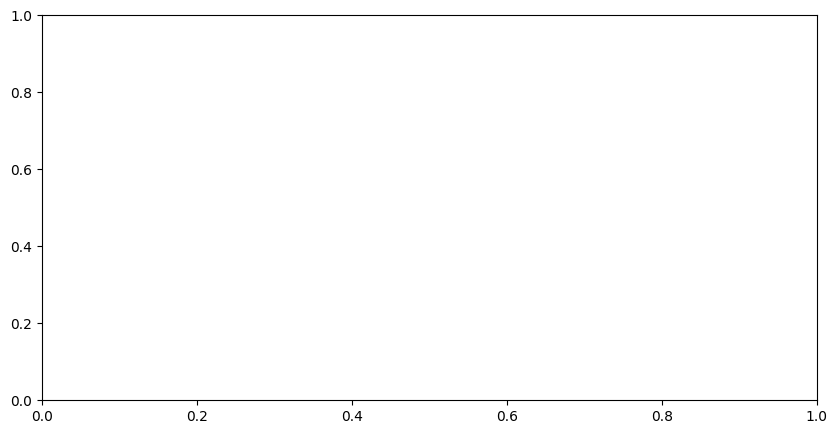

In [34]:
plt.figure(figsize=(16,8))
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xticks(range(ni))
ax.set_yticks([0, 1])
ax.set_yticklabels(["Left", "Right"])
ax.pcolormesh(x, y, intensity_samples, cmap='gray', vmin=minI, vmax=maxI)
for k in x:
    plt.axvline(k, ls='-', c='w', lw=4) # white line between bars
for k in y:
  plt.axhline(k, ls='-', c='white', lw=20) # white line between samples

### Encode the patterns

**Count Rate coding**

In [19]:
input_rates = right_intensity * b2.Hz # or left_intensity

print(input_rates)

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ] Hz


In [20]:
b2.start_scope()
input_group = b2.PoissonGroup(ni, rates = input_rates)

Poisson distribution: 
$$ P\{x = k\} = \dfrac{λ^ke^{-λ}}{k!} $$

k -- the number of occurrences

λ -- the expected rate of occurrences  


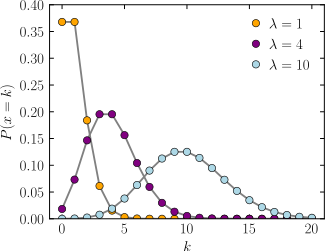

In [21]:
model_n = '''
dv/dt = (v_rest-v)/tau : volt
v_rest : volt
v_reset : volt
vt : volt
tau : second
'''
group_n = b2.NeuronGroup(4, model_n, threshold = 'v > vt', reset = 'v = v_reset', method = 'exact')
group_n.v = -65 * b2.mV
group_n.v_rest = -65 * b2.mV
group_n.v_reset = -65 * b2.mV
group_n.vt = -52 * b2.mV
group_n.tau = 1 * b2.ms

synapses_e = b2.Synapses(input_group, group_n, on_pre = 'v += 0.01 * volt')
synapses_e.connect(condition = 'i == j')

i_spike_mon = b2.SpikeMonitor(input_group)
n_spike_mon = b2.SpikeMonitor(group_n)
n_state_mon = b2.StateMonitor(group_n, ['v', 'vt'], record=True)

b2.run(200 * b2.ms)

In [22]:
for n in range(ni):
  print(f"t of spikes from {n}th input neuron", i_spike_mon.spike_trains()[n])

t of spikes from 0th input neuron [] s
t of spikes from 1th input neuron [] s
t of spikes from 2th input neuron [] s
t of spikes from 3th input neuron [] s
t of spikes from 4th input neuron [] s
t of spikes from 5th input neuron [] s
t of spikes from 6th input neuron [] s
t of spikes from 7th input neuron [] s
t of spikes from 8th input neuron [] s


IndexError: ignored

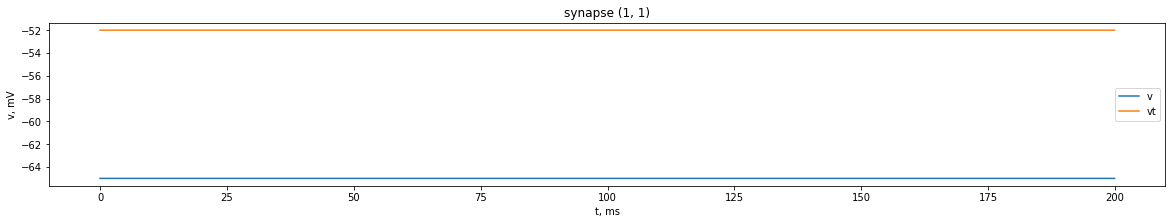

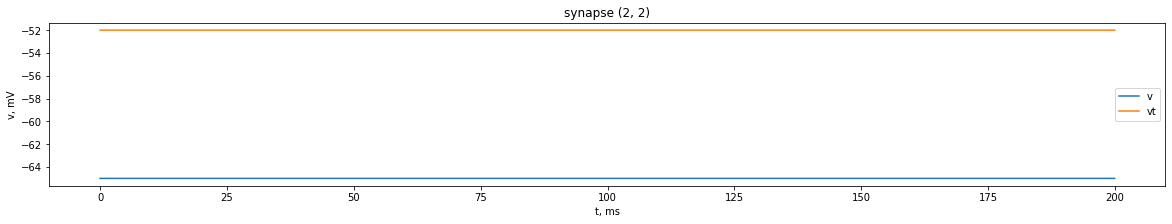

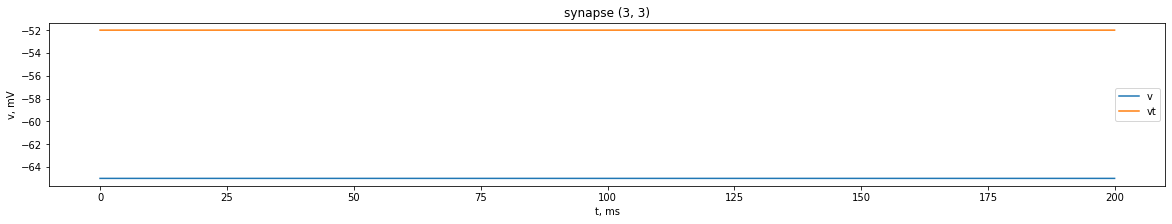

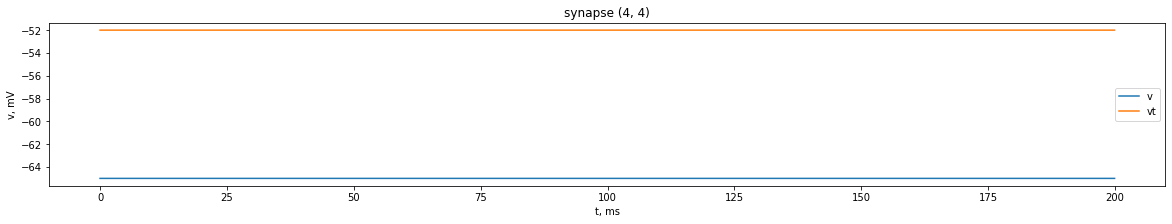

<Figure size 1440x216 with 0 Axes>

In [24]:
def show_plots(i_spike_mon, n_spike_mon, n_state_mon):
    for s in range(ni):
        plt.figure(figsize=(20,3))
        plt.plot(n_state_mon.t/b2.ms, n_state_mon.v[s]/b2.mV, label = 'v')
        plt.plot(n_state_mon.t/b2.ms, n_state_mon.vt[s]/b2.mV , label = 'vt')
        for t in i_spike_mon.spike_trains()[s]:
            plt.axvline(t/b2.ms, ls = '--', c = 'C1', lw = 0.8) # orange == pre
        for t in n_spike_mon.spike_trains()[s]:
            plt.axvline(t/b2.ms, ls = '--', c = 'C2', lw = 0.8) # green == post
        plt.legend()
        plt.xlabel("t, ms")
        plt.ylabel("v, mV")
        plt.title(f"synapse ({s+1}, {s+1})")
        
show_plots(i_spike_mon, n_spike_mon, n_state_mon)
plt.plot(i_spike_mon.t/b2.ms, i_spike_mon.i, '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.yticks(range(0,len(input_rates)))

Text(0.5, 0, 'Spike rate, Hz')

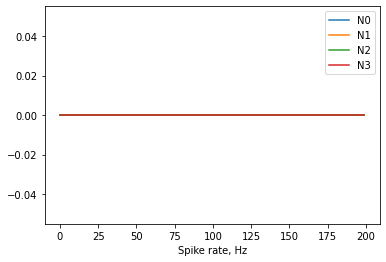

In [11]:
rate = np.zeros((4,200))
for n in range(4):
  for t in range(1,200):
    rate[n][t] = len([s for s in i_spike_mon.spike_trains()[n] if s<t*b2.ms])/t*1000
  plt.plot(rate[n], label=f"N{n}")
plt.legend()
plt.xlabel("Time, ms")
plt.xlabel("Spike rate, Hz")

**TTFS coding**

In [12]:
right_intensity_norm = (right_intensity - min_intensity) / (max_intensity - min_intensity) 
left_intensity_norm = (left_intensity - min_intensity) / (max_intensity - min_intensity) 

print(right_intensity_norm)
print(left_intensity_norm)

[0.         0.33333333 0.66666667 1.        ]
[1.         0.66666667 0.33333333 0.        ]


In [13]:
min_spike_time = 0
max_spike_time = 3

In [14]:
input_times = [[],[],[],[]]
for n in range(ni):
  input_times[n] = - (max_spike_time - min_spike_time) * right_intensity_norm + max_spike_time  # or left_intensity_norm
#input_times = - (max_spike_time - min_spike_time) * right_intensity_norm + max_spike_time  # or left_intensity_norm

print(input_times)

[array([3., 2., 1., 0.]), array([3., 2., 1., 0.]), array([3., 2., 1., 0.]), array([3., 2., 1., 0.])]


In [15]:
b2.start_scope()

input_group = b2.SpikeGeneratorGroup(ni, indices = list(range(ni)), times = input_times * b2.ms)

ValueError: ignored

In [ ]:
model_n = '''
dv/dt = (v_rest-v)/tau : volt
v_rest : volt
v_reset : volt
vt : volt
tau : second
'''
group_n = b2.NeuronGroup(4, model_n, threshold = 'v > vt', reset = 'v = v_reset', method = 'exact')
group_n.v = -65 * b2.mV
group_n.v_rest = -65 * b2.mV
group_n.v_reset = -65 * b2.mV
group_n.vt = -52 * b2.mV
group_n.tau = 1 * b2.ms

synapses_e = b2.Synapses(input_group, group_n, on_pre = 'v += 0.01 * volt')
synapses_e.connect(condition = 'i == j')

i_spike_mon = b2.SpikeMonitor(input_group)
n_spike_mon = b2.SpikeMonitor(group_n)
n_state_mon = b2.StateMonitor(group_n, ['v', 'vt'], record=True)

b2.run(20 * b2.ms)

WARNING    'i' is an internal variable of group 'synapses', but also exists in the run namespace with the value 3. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


t of spikes from 1 input neuron [3.] ms
t of spikes from 2 input neuron [2.] ms
t of spikes from 3 input neuron [1.] ms
t of spikes from 4 input neuron [0.] s


([<matplotlib.axis.YTick at 0x7f63c0a54650>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

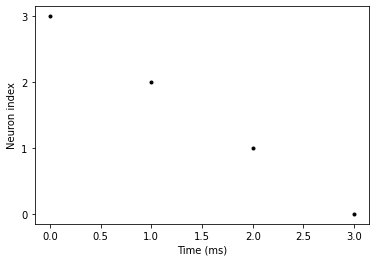

In [ ]:
for i in range(ni):
  print(f"t of spikes from {i+1} input neuron", i_spike_mon.spike_trains()[i])

plt.plot(i_spike_mon.t/b2.ms, i_spike_mon.i, '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.yticks([0,1,2,3])